###Task 3: SMILING Molecules
The task involves predicting molecular similarity using molecular descriptors and SMILES representation.

Encorporated a kNN model after analysing the plots and trying out various other models.

Iterated over to find the best k.

##Importing dependencies

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##Loading Data Frame from csv file

In [57]:
data = pd.read_csv('data.csv')

##Assigning Features to X and Target to y

In [70]:
X = data[['tanimoto_cdk_Extended', 'TanimotoCombo']]

data['Dis/Sim'] = data['frac_similar'].apply(lambda x: 1 if x > 0.5 else 0) #converting frac_similar to either 0 or 1 (dissimilar or similar)

y = data['Dis/Sim']

In [71]:
print(data.head())

   id_pair                          curated_smiles_molecule_a  \
0        1                         CCN(CC)CC(=O)Nc1c(C)cccc1C   
1        2  Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CC...   
2        3                                 COc1ccccc1OCC(O)CO   
3        4   CCOc1ccccc1OCCN[C@H](C)Cc1ccc(OC)c(S(N)(=O)=O)c1   
4        5                                 C[C@H](N)Cc1ccccc1   

                           curated_smiles_molecule_b  tanimoto_cdk_Extended  \
0                  CCCN1CCCC[C@H]1C(=O)Nc1c(C)cccc1C               0.641434   
1  Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CCCC2               0.928846   
2                   COC(=O)CCc1ccc(OCC(O)CNC(C)C)cc1               0.381119   
3        CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1               0.213429   
4                                  CC(C)(N)Cc1ccccc1               0.905660   

   TanimotoCombo  frac_similar  binary_target  target  Dis/Sim  
0          1.623        0.4688              0       0        0  
1   

##Visualizing

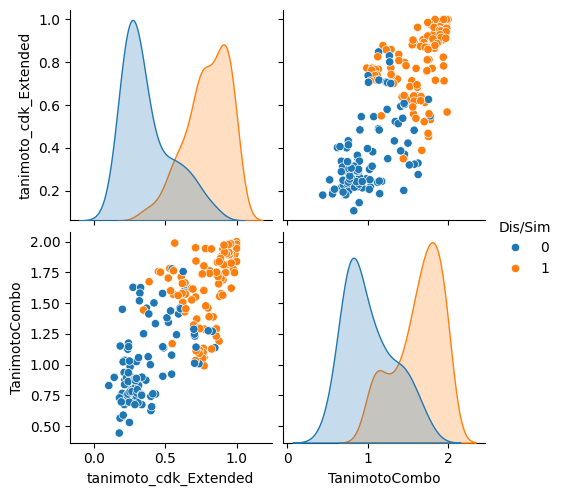

In [72]:
import seaborn as sns


sns.pairplot(data, hue='Dis/Sim', vars=['tanimoto_cdk_Extended', 'TanimotoCombo'])
plt.show()


##Splitting X and Y for Training and Testing

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Scaling using StandardScaler

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##KNN MODEL

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Defining Model
knn_model = KNeighborsClassifier(n_neighbors=5)

#Training Model
knn_model.fit(X_train_scaled, y_train)

#Predciting
y_pred_knn = knn_model.predict(X_test_scaled)


accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("\nKNN Model Accuracy:", accuracy_knn)



KNN Model Accuracy: 0.95
